<a href="https://colab.research.google.com/github/delowerhossentuhin/Sentiment-Analysis-NLP/blob/main/Stock%20Market%20Sentiment/Stock_Market_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import string
import re
import nltk
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
stock_df=pd.read_csv('/content/drive/MyDrive/Project and Coding/Stock Market Sentiment Analysis-NLP/stock_data.csv')

In [3]:
#stock_df.head(20)

In [4]:
#Case Folding
stock_df['Text_nlp']=stock_df['Text'].str.lower()
#stock_df.head(20)

In [5]:
#contraction
stock_df['Text_nlp']=stock_df['Text_nlp'].apply(contractions.fix)
#stock_df.loc[10]
#stock_df.head(20)

In [6]:
#Proper Tokenization
# import re
# stock_df['Text_nlp'] = stock_df['Text_nlp'].apply(lambda x: re.sub(r"[_-]", " ", x))
stock_df['Tokens']=stock_df['Text_nlp'].apply(word_tokenize)
#stock_df.loc[10]
#stock_df.head(20)

In [7]:
# # Synonym Substituition
# def synonym_substitution(x):
#     substituted=[]
#     for word in x:
#         synsets=wordnet.synsets(word)
#         if synsets:
#             synonym = synsets[0].lemmas()[0].name()
#             substituted.append(synonym)
#         else:
#             substituted.append(word)
#     return substituted

# stock_df['Tokens']=stock_df['Tokens'].apply(synonym_substitution)
# #stock_df.head(20)


In [8]:
#Stop Words Removal
stop_words=set(stopwords.words('english'))
def stopWordRemove(x):
  swRemoved=[]
  for word in x:
    if word not in stop_words:
      swRemoved.append(word)
  return swRemoved
stock_df['Tokens']=stock_df['Tokens'].apply(stopWordRemove)
#stock_df.loc[10]
#stock_df.head(20)

In [9]:
#Punctuation Removal
def punctuationRemoved(x):
  pRemoved=[]
  for word in x:
    if word not in string.punctuation:
      pRemoved.append(word)
  return pRemoved
stock_df['Tokens']=stock_df['Tokens'].apply(punctuationRemoved)
#stock_df.loc[10]
#stock_df.head(20)


In [10]:
#Stemming
stemmer=PorterStemmer()
def stemming(x):
  wStemming=[]
  for word in x:
    wStemming.append(stemmer.stem(word))
  return wStemming
stock_df['Tokens']=stock_df['Tokens'].apply(stemming)

In [11]:
#lemmatization
lemmatizer=WordNetLemmatizer()
def lemmatization(x):
  lemmaWord=[]
  for word in x:
    lemmaWord.append(lemmatizer.lemmatize(word))
  return lemmaWord
stock_df['Tokens']=stock_df['Tokens'].apply(lemmatization)
#stock_df.head(20)

In [12]:
#Restore Text from Tokens
stock_df['Processed_Text'] = stock_df['Tokens'].apply(lambda x: ' '.join(x))
#stock_df[['Text','Processed_Text']].head(20)

In [13]:
#Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(stock_df['Processed_Text'])
y = stock_df['Sentiment']

In [14]:
# Training Set and Testing Set
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#Implementing 'Multinomial' Naive Bayes Classifiers
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.84      0.34      0.48       427
           1       0.71      0.96      0.82       732

    accuracy                           0.73      1159
   macro avg       0.78      0.65      0.65      1159
weighted avg       0.76      0.73      0.70      1159



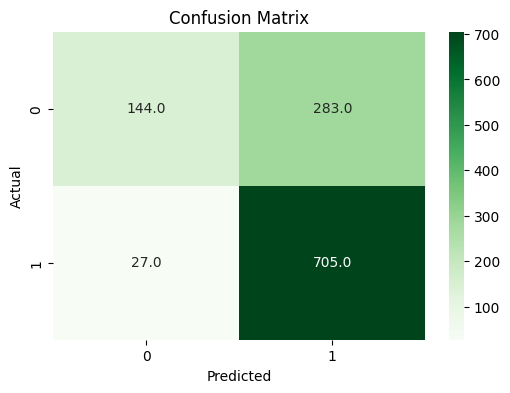

In [17]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='.1f',cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()